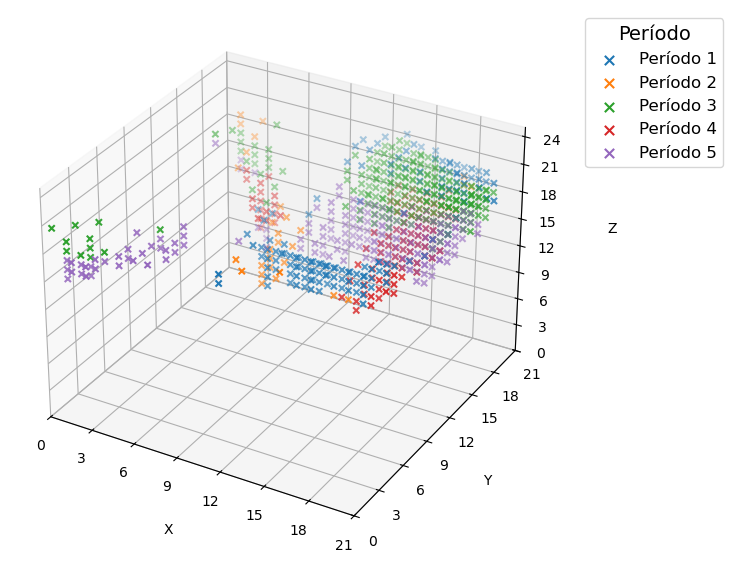

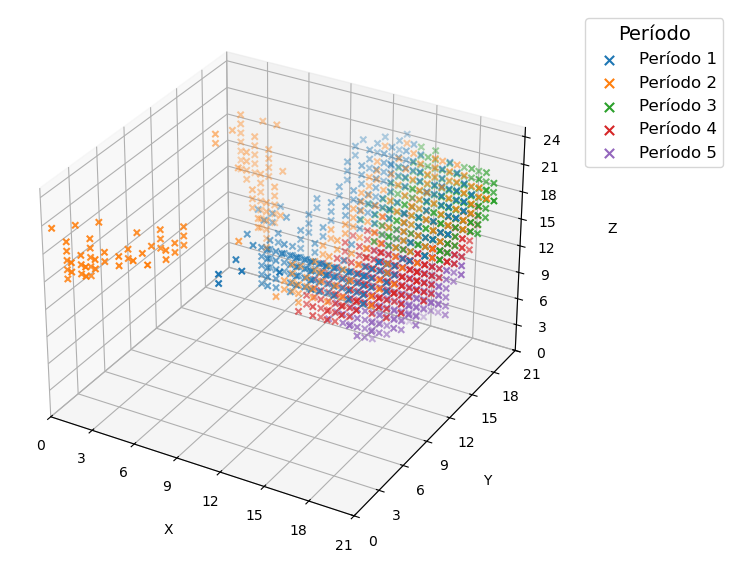

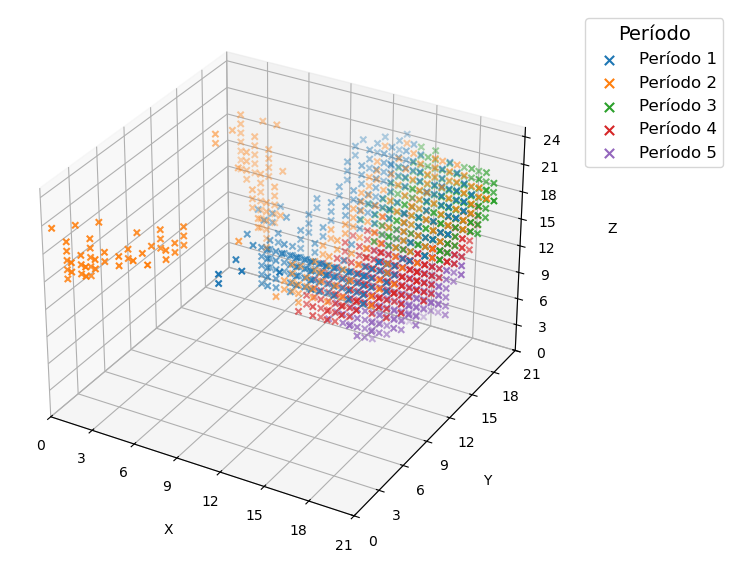

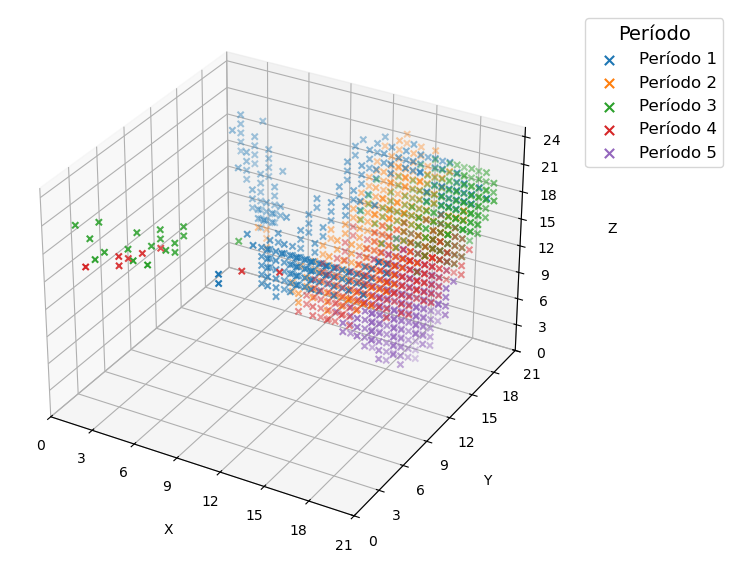

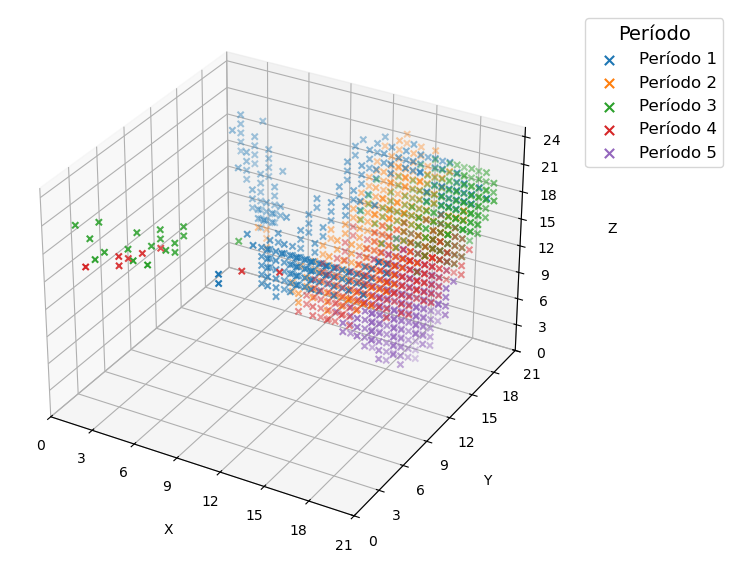

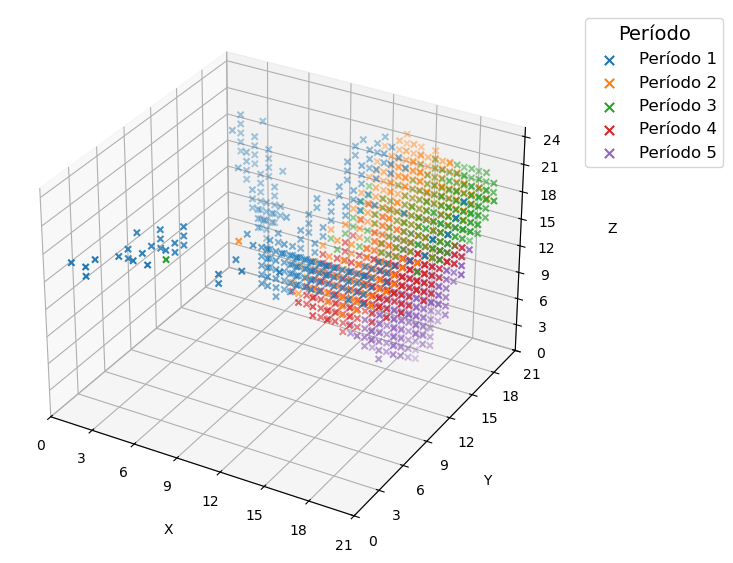

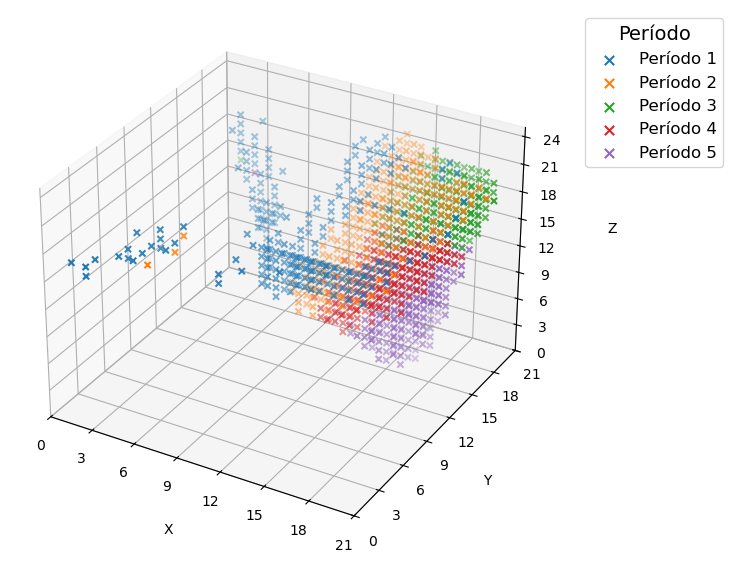

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
import os
import shutil

# Habilitar modo interactivo (opcional)
plt.ion()

# Directorios y rutas base
data_excel   = 'C:/Users/ricar/Documents/MATLAB/OPTSIT/Datos.xlsx'
results_xlsx = 'C:/Users/ricar/Documents/MATLAB/OPTSIT/Resultados_Optimizacion_times.xlsx'
output_dir   = 'C:/Users/ricar/Documents/MATLAB/OPTSIT/graficos'
archive_base = 'C:/Users/ricar/Documents/MATLAB/OPTSIT/graficos_consistentes_v2'
os.makedirs(output_dir, exist_ok=True)

# Carga de atributos de bloques
xls_data = pd.ExcelFile(data_excel)
df_data  = pd.read_excel(xls_data, sheet_name='Newman')
df_data  = df_data.rename(columns={df_data.columns[0]: 'BloqueID'})

# Escenarios: (label, hoja Excel, texto de caption)
scenarios = [
    ('10_min',   'Resultados_10_min',   '10 min'),
    ('30_min',   'Resultados_30_min',   '30 min'),
    ('1_hora',   'Resultados_1_hora',   '1 hora'),
    ('2_horas',  'Resultados_2_horas',  '2 horas'),
    ('5_horas',  'Resultados_5_horas',  '5 horas'),
    ('12_horas', 'Resultados_12_horas', '12 horas'),
    ('24_horas', 'Resultados_24_horas', '24 horas'),
]

for label, sheet, caption in scenarios:
    # 1) Leer resultados de optimización y extraer IDs
    df_res = pd.read_excel(results_xlsx, sheet_name=sheet)
    df_pb = (
        df_res[['Período', 'Bloques Extraídos (IDs)']]
        .dropna()
        .assign(BloqueID=lambda x: x['Bloques Extraídos (IDs)'].str.split(','))
        .explode('BloqueID')
    )
    df_pb['BloqueID'] = df_pb['BloqueID'].str.strip().astype(int)

    # 2) Merge con atributos para obtener x, y, z
    df_merge = pd.merge(df_pb, df_data, on='BloqueID', how='left')

    # 3) Crear figura 3D más ancha y ajustar márgenes
    fig = plt.figure(figsize=(12, 6))
    fig.subplots_adjust(left=0.05, right=0.80, bottom=0.05, top=0.95)
    ax = fig.add_subplot(111, projection='3d')

    # 4) Trazar cada período
    for periodo in sorted(df_merge['Período'].unique()):
        df_sub = df_merge[df_merge['Período'] == periodo]
        ax.scatter(
            df_sub['x'], df_sub['y'], df_sub['z'],
            marker='x',
            label=f'Período {int(periodo)}'
        )

    # 5) Forzar misma escala en todos los ejes
    ax.set_xlim(0, 21)
    ax.set_ylim(0, 21)
    ax.set_zlim(0, 25)

    # 6) Etiquetas de ejes con labelpad
    ax.set_xlabel('X', labelpad=12)
    ax.set_ylabel('Y', labelpad=12)
    ax.set_zlabel('Z', labelpad=20)

    # 7) Forzar ticks enteros en cada eje
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.zaxis.set_major_locator(MaxNLocator(integer=True))

    # 8) Leyenda fuera del área de datos
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        title='Período',
        fontsize=12,
        title_fontsize=14,
        markerscale=1.5     # escala los marcadores de la leyenda en 150%
        )


    # 9) Título y guardado de PNG
    # ax.set_title(f'Extracción en {caption}')
    png_path = os.path.join(output_dir, f'extraccion_{label}.png')
    fig.savefig(png_path, dpi=150)

    # 10) Mostrar y cerrar
    plt.show()
    plt.close(fig)

# 11) Limpiar viejos ZIP/RAR si existen
zip_path = archive_base + '.zip'
rar_path = archive_base + '.rar'
for p in (zip_path, rar_path):
    if os.path.exists(p):
        os.remove(p)

# 12) Crear ZIP y renombrar a RAR
shutil.make_archive(archive_base, 'zip', output_dir)
os.rename(zip_path, rar_path)


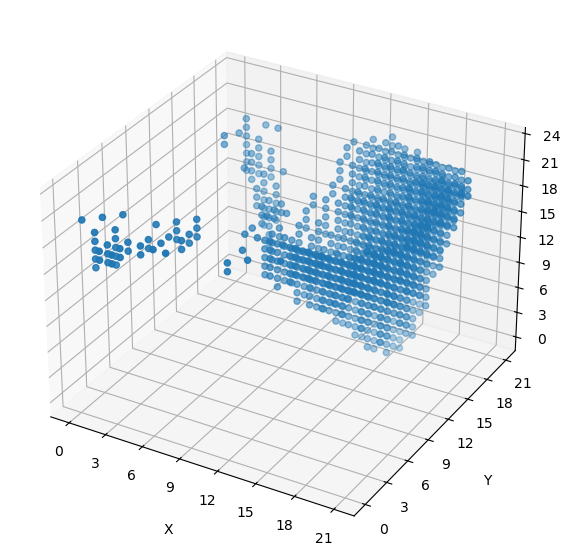

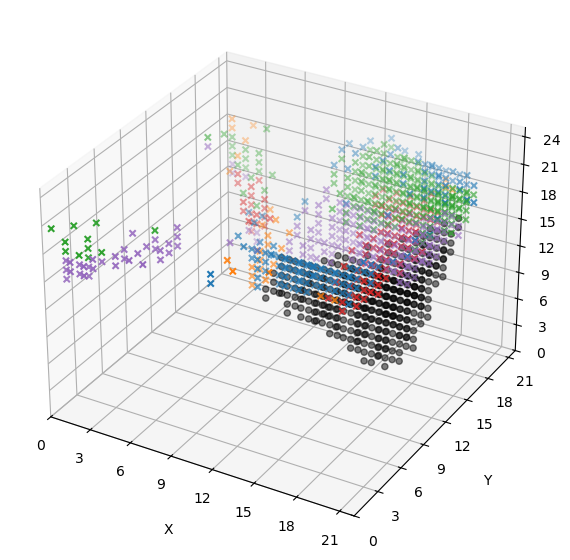

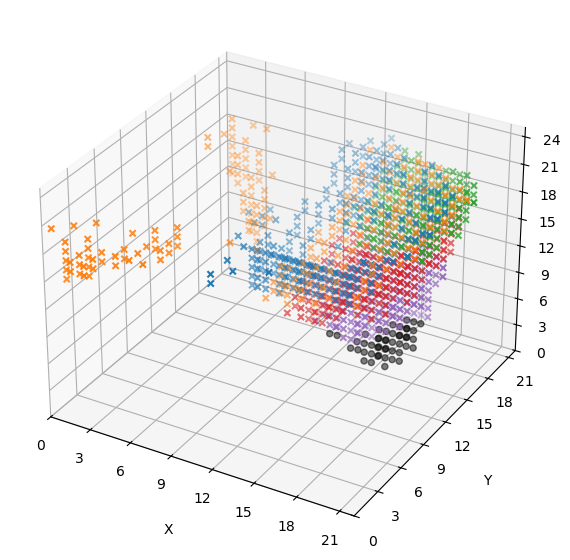

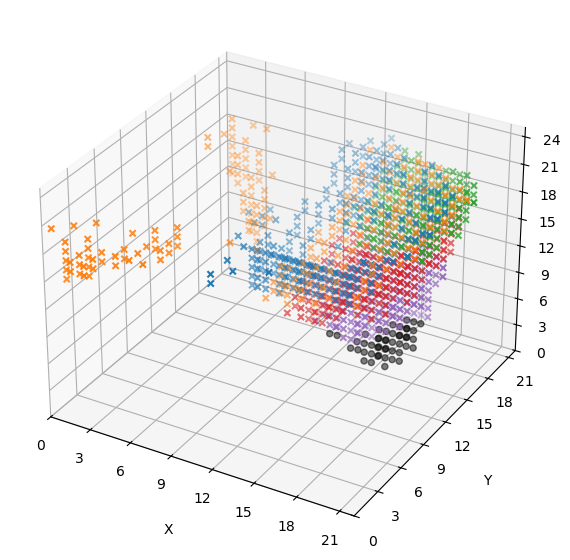

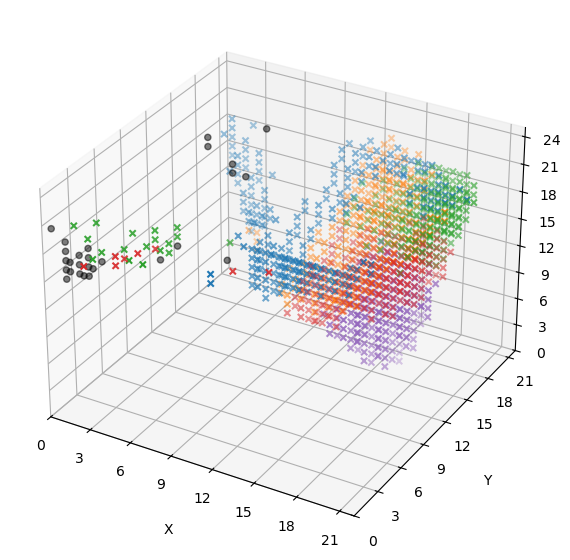

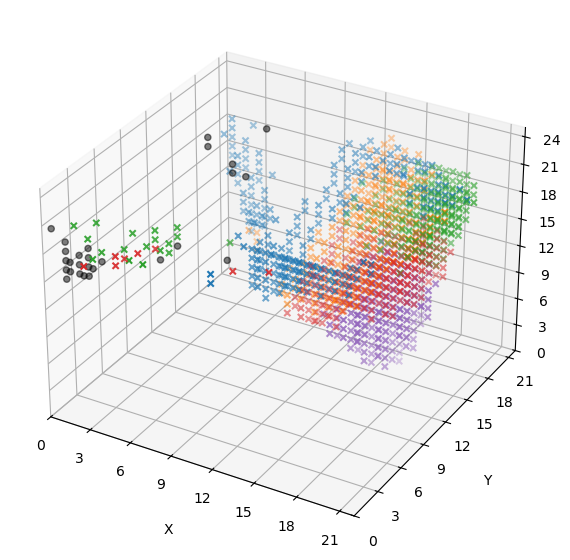

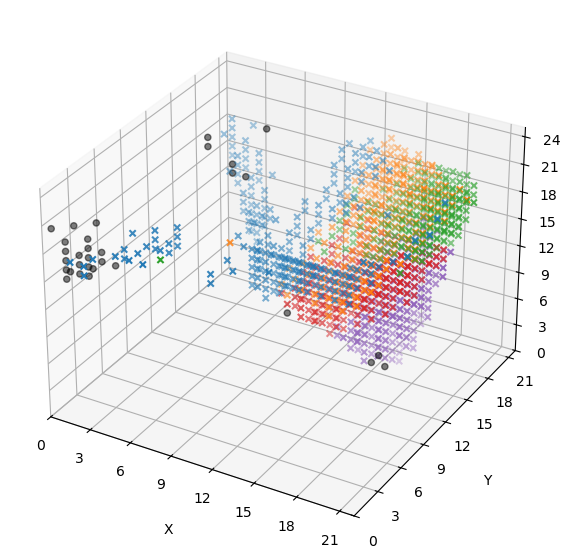

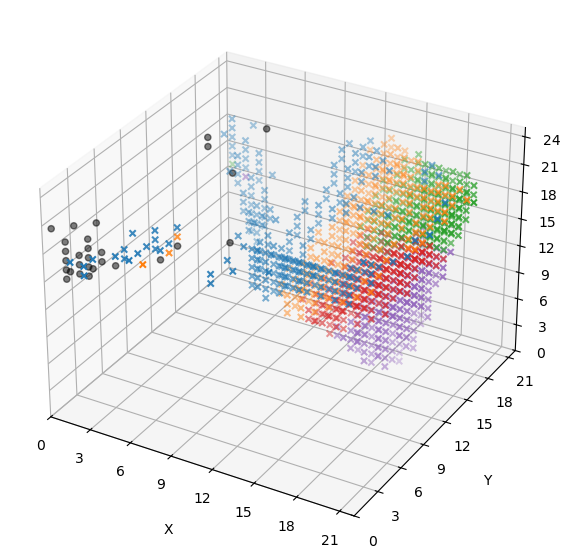

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
import os
import shutil

# Habilitar modo interactivo (opcional)
plt.ion()

# Directorios y rutas base
data_excel   = 'C:/Users/ricar/Documents/MATLAB/OPTSIT/Datos.xlsx'
results_xlsx = 'C:/Users/ricar/Documents/MATLAB/OPTSIT/Resultados_Optimizacion_times.xlsx'
output_dir   = 'C:/Users/ricar/Documents/MATLAB/OPTSIT/graficos'
archive_base = 'C:/Users/ricar/Documents/MATLAB/OPTSIT/graficos_consistentes_v2'
os.makedirs(output_dir, exist_ok=True)

# 0) Carga de atributos de todos los bloques
xls_data = pd.ExcelFile(data_excel)
df_data  = pd.read_excel(xls_data, sheet_name='Newman')
df_data  = df_data.rename(columns={df_data.columns[0]: 'BloqueID'})

# ——— Gráfico adicional: todos los bloques antes de la extracción ———
fig0 = plt.figure(figsize=(12, 6))
fig0.subplots_adjust(left=0.05, right=0.80, bottom=0.05, top=0.95)
ax0 = fig0.add_subplot(111, projection='3d')

# Dibujar todos los bloques
ax0.scatter(
    df_data['x'], df_data['y'], df_data['z'],
    # c='steelblue', marker='o', s=20, alpha=0.6
    # , label='Modelo de la mina'
)

# Misma escala en todos los ejes
ax.set_xlim(0, 22)
ax.set_ylim(0, 22)
ax.set_zlim(0, 25)

# Etiquetas y formateo
ax0.set_xlabel('X', labelpad=12)
ax0.set_ylabel('Y', labelpad=12)
ax0.set_zlabel('Z', labelpad=20)
ax0.xaxis.set_major_locator(MaxNLocator(integer=True))
ax0.yaxis.set_major_locator(MaxNLocator(integer=True))
ax0.zaxis.set_major_locator(MaxNLocator(integer=True))

# Leyenda y título
# ax0.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# ax0.set_title('Caso base: Mina rajo abierto')

# Guardar y mostrar
png0 = os.path.join(output_dir, 'caso_base.png')
fig0.savefig(png0, dpi=150)
plt.show()
plt.close(fig0)

# ——— Ahora el bucle de escenarios con bloques no extraídos y extraídos ———
scenarios = [
    ('10_min',   'Resultados_10_min',   '10 min'),
    ('30_min',   'Resultados_30_min',   '30 min'),
    ('1_hora',   'Resultados_1_hora',   '1 hora'),
    ('2_horas',  'Resultados_2_horas',  '2 horas'),
    ('5_horas',  'Resultados_5_horas',  '5 horas'),
    ('12_horas', 'Resultados_12_horas', '12 horas'),
    ('24_horas', 'Resultados_24_horas', '24 horas'),
]

for label, sheet, caption in scenarios:
    # 1) Leer resultados de optimización y extraer IDs
    df_res = pd.read_excel(results_xlsx, sheet_name=sheet)
    df_pb  = (
        df_res[['Período', 'Bloques Extraídos (IDs)']]
        .dropna()
        .assign(BloqueID=lambda x: x['Bloques Extraídos (IDs)'].str.split(','))
        .explode('BloqueID')
    )
    df_pb['BloqueID'] = df_pb['BloqueID'].str.strip().astype(int)

    # 2) Merge para extraídos
    df_extr = pd.merge(df_pb, df_data, on='BloqueID', how='left')

    # 3) Determinar no extraídos
    extra_ids = set(df_extr['BloqueID'])
    df_noextr = df_data[~df_data['BloqueID'].isin(extra_ids)]

    # 4) Crear figura 3D
    fig = plt.figure(figsize=(12, 6))
    fig.subplots_adjust(left=0.05, right=0.80, bottom=0.05, top=0.95)
    ax = fig.add_subplot(111, projection='3d')

    # 5) Dibujar no extraídos (gris claro)
    ax.scatter(
        df_noextr['x'], df_noextr['y'], df_noextr['z'],
        c='black', marker='o', alpha=0.5,
        label='No extraídos'
    )

    # 6) Dibujar extraídos por período
    for periodo in sorted(df_extr['Período'].unique()):
        df_sub = df_extr[df_extr['Período'] == periodo]
        ax.scatter(
            df_sub['x'], df_sub['y'], df_sub['z'],
            marker='x',
            label=f'Período {int(periodo)}'
        )

    # 7) Misma escala 0–21
    ax.set_xlim(0, 22)
    ax.set_ylim(0, 22)
    ax.set_zlim(0, 25)

    # 8) Etiquetas y ticks enteros
    ax.set_xlabel('X', labelpad=12)
    ax.set_ylabel('Y', labelpad=12)
    ax.set_zlabel('Z', labelpad=20)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.zaxis.set_major_locator(MaxNLocator(integer=True))

#     # # 9) Leyenda y título
#     ax.legend(
#     bbox_to_anchor=(1.05, 1),
#     loc='upper left',
#     title='Período',
#     fontsize=25,
#     title_fontsize=14,
#     markerscale=3    # escala los marcadores de la leyenda en 150%
# )
#     # ax.set_title(f'Extracción en {caption}')

    # 10) Guardar y mostrar
    png_path = os.path.join(output_dir, f'extraccion_{label}.png')
    fig.savefig(png_path, dpi=150)
    plt.show()
    plt.close(fig)

# ——— Empaquetado final ———
zip_path = archive_base + '.zip'
rar_path = archive_base + '.rar'
for p in (zip_path, rar_path):
    if os.path.exists(p):
        os.remove(p)

shutil.make_archive(archive_base, 'zip', output_dir)
os.rename(zip_path, rar_path)


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.animation import FuncAnimation, PillowWriter
import os

# Rutas
data_excel   = 'C:/Users/ricar/Documents/MATLAB/OPTSIT/Datos.xlsx'
results_xlsx = 'C:/Users/ricar/Documents/MATLAB/OPTSIT/Resultados_Optimizacion_times.xlsx'
output_dir   = 'C:/Users/ricar/Documents/MATLAB/OPTSIT/graficos_anim'
os.makedirs(output_dir, exist_ok=True)

# ——— 0) Cargo todos los bloques ———
df_data = pd.read_excel(data_excel, sheet_name='Newman')
df_data = df_data.rename(columns={df_data.columns[0]:'BloqueID'})

# ——— 1) Preparo un set de IDs por cada período ———
period_sheets = [
    'Resultados_10_min',
    'Resultados_30_min',
    'Resultados_1_hora',
    'Resultados_2_horas',
    'Resultados_5_horas',
    'Resultados_12_horas',
    'Resultados_24_horas',
]
extracted_sets = []
for sheet in period_sheets:
    df_res = pd.read_excel(results_xlsx, sheet_name=sheet)
    df_pb = (
        df_res[['Bloques Extraídos (IDs)']]
        .dropna()
        .assign(BloqueID=lambda x: x['Bloques Extraídos (IDs)'].str.split(','))
        .explode('BloqueID')
    )
    ids = set(df_pb['BloqueID'].str.strip().astype(int))
    extracted_sets.append(ids)

# ——— 2) Configuro figura y ejes ———
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,21); ax.set_ylim(0,21); ax.set_zlim(0,21)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))

# ——— 3) Función de actualización ———
def update(frame):
    ax.cla()
    # restablecer límites y ticks
    ax.set_xlim(0,21); ax.set_ylim(0,21); ax.set_zlim(0,21)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.zaxis.set_major_locator(MaxNLocator(integer=True))

    if frame == 0:
        # Frame 0: muestro todos los bloques en azul claro
        ax.scatter(
            df_data['x'], df_data['y'], df_data['z'],
            c='steelblue', marker='o', s=20, alpha=0.6,
            label='Caso base'
        )
        ax.set_title('Caso base: Todos los bloques')
    else:
        # Frame i>=1: elimino bloques de períodos 1..i y destaco período i
        # IDs extraídos hasta el período i
        cum_ids = set().union(*extracted_sets[:frame])
        # bloques restantes
        remaining = df_data[~df_data['BloqueID'].isin(cum_ids)]
        ax.scatter(
            remaining['x'], remaining['y'], remaining['z'],
            c='lightgray', marker='.', alpha=0.4,
            label='Restantes'
        )
        # bloques del período actual (i)
        current_ids = extracted_sets[frame-1]
        current = df_data[df_data['BloqueID'].isin(current_ids)]
        ax.scatter(
            current['x'], current['y'], current['z'],
            c=f'C{frame}', marker='x', s=50,
            label=f'Período {frame}'
        )
        ax.set_title(f'Extracción Período {frame}')

    # leyenda y etiquetas
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    ax.legend(
        fontsize=10,
        title='Leyenda',
        title_fontsize=12,
        markerscale=1.2,
        bbox_to_anchor=(1.05,1),
        loc='upper left'
    )
    return ax,

# ——— 4) Genero la animación ———
n_frames = 1 + len(extracted_sets)  # incluye el caso base
anim = FuncAnimation(fig, update, frames=n_frames, interval=1000)

# ——— 5) Guardo como GIF ———
gif_path = os.path.join(output_dir, 'anim_extr_2.gif')
writer = PillowWriter(fps=1)
anim.save(gif_path, writer=writer)

plt.close(fig)
